In [ ]:
import pysm3
import pysm3.units as u
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sky = pysm3.Sky(nside=128, preset_strings=["d1", "s1"])
map_100GHz = sky.get_emission(100 * u.GHz)
map_100GHz = map_100GHz.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(100*u.GHz))
hp.mollview(map_100GHz[0], min=0, max=1e2, title="I map", unit=map_100GHz.unit)

In [ ]:
import healpy as hp

# Set the resolution (Nside)
nside = 512  # adjust as needed
npix = hp.nside2npix(nside)

# Load the default CMB model (includes lensed scalar TT, TE, EE, BB)
sky_config = pysm3.Sky(nside=nside, preset_strings=["c1"])

# Frequency in GHz
frequency = 150 * u.GHz

# Generate the map (I, Q, U)
cmb_map = sky_config.get_emission(frequency)

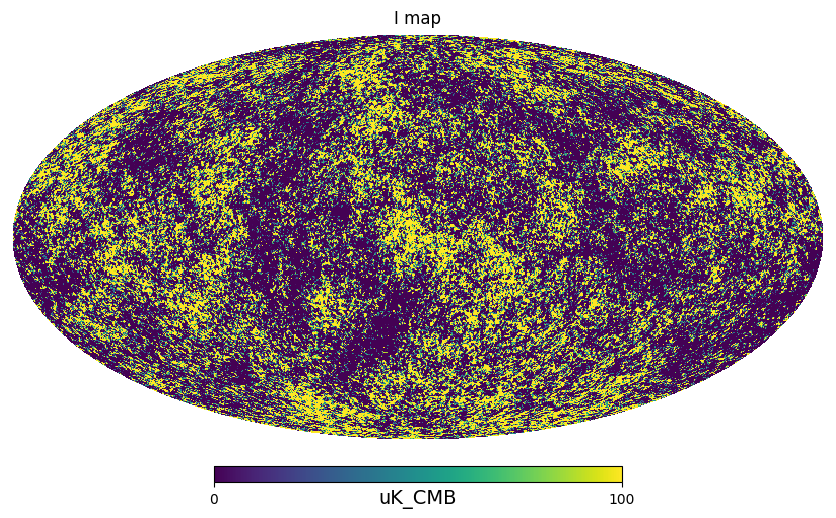

In [ ]:
cmb_map = cmb_map.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(frequency))
hp.mollview(cmb_map[0], min=0, max=1e2, title="I map", unit=cmb_map.unit)

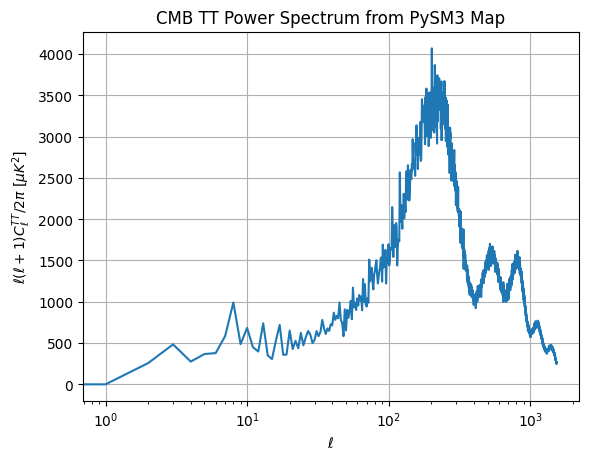

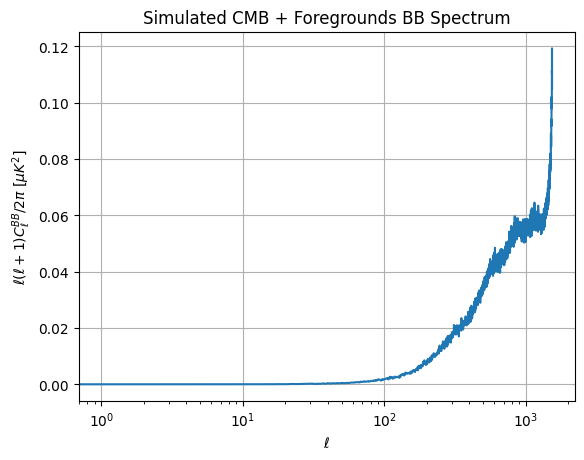

In [ ]:
# Only use the temperature (I) component
cmb_temperature = cmb_map[0]

# Compute the power spectrum (TT only)
cls = hp.anafast(cmb_temperature)

cl = hp.anafast(cmb_map, pol=True)


# cls is a 1D array of C_ell for TT (no polarization here)
# Optionally, compute ell values
ell = np.arange(len(cls))

# Plot it (optional)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ell, cls * ell * (ell + 1) / (2 * np.pi))
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/2\pi$ [$\mu K^2$]')
plt.title('CMB TT Power Spectrum from PySM3 Map')
plt.grid()
plt.show()

# cl[2] corresponds to BB power spectrum (assuming pol=True order)
ell = np.arange(len(cl[2]))

import matplotlib.pyplot as plt
plt.plot(ell, cl[2] * ell * (ell + 1) / (2 * np.pi))
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{BB}/2\pi$ [$\mu K^2$]')
plt.title('Simulated CMB + Foregrounds BB Spectrum')
plt.grid()
plt.show()